In [1]:
import numpy as np
import pandas as pd
#import Scikit-learn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
#import data csv
df = pd.read_csv('../Datasets/AMD Historical Data.csv')

#print data 
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,11.43,11.42,11.65,11.02,55.18M,0.79%
1,1/4/2017,11.43,11.45,11.52,11.23,40.78M,0.00%
2,1/5/2017,11.24,11.43,11.69,11.23,38.86M,-1.66%
3,1/6/2017,11.32,11.29,11.49,11.11,34.45M,0.71%
4,1/9/2017,11.49,11.37,11.64,11.31,37.30M,1.50%


In [3]:
#in ra thông tin thuộc tính
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1624 non-null   object 
 1   Price     1624 non-null   float64
 2   Open      1624 non-null   float64
 3   High      1624 non-null   float64
 4   Low       1624 non-null   float64
 5   Vol.      1624 non-null   object 
 6   Change %  1624 non-null   object 
dtypes: float64(4), object(3)
memory usage: 88.9+ KB


In [4]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,11.43,11.42,11.65,11.02,55.18M,0.79%
1,1/4/2017,11.43,11.45,11.52,11.23,40.78M,0.00%
2,1/5/2017,11.24,11.43,11.69,11.23,38.86M,-1.66%
3,1/6/2017,11.32,11.29,11.49,11.11,34.45M,0.71%
4,1/9/2017,11.49,11.37,11.64,11.31,37.30M,1.50%
...,...,...,...,...,...,...,...
1619,6/9/2023,124.92,123.57,127.25,123.55,75.11M,3.20%
1620,6/12/2023,129.19,128.52,130.48,126.40,85.22M,3.42%
1621,6/13/2023,124.53,132.32,132.83,122.45,131.67M,-3.61%
1622,6/14/2023,127.33,126.53,127.72,123.81,95.24M,2.25%


In [5]:
#Bỏ dòng bị trống dự liệu
df = df.dropna()
#Chuyển đổi dữ liệu cột Vol. sang số
df['Vol.'] = df['Vol.'].str.replace('M', '').astype(float) * 1000000


In [6]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,11.43,11.42,11.65,11.02,55180000.0,0.79%
1,1/4/2017,11.43,11.45,11.52,11.23,40780000.0,0.00%
2,1/5/2017,11.24,11.43,11.69,11.23,38860000.0,-1.66%
3,1/6/2017,11.32,11.29,11.49,11.11,34450000.0,0.71%
4,1/9/2017,11.49,11.37,11.64,11.31,37300000.0,1.50%
...,...,...,...,...,...,...,...
1619,6/9/2023,124.92,123.57,127.25,123.55,75110000.0,3.20%
1620,6/12/2023,129.19,128.52,130.48,126.40,85220000.0,3.42%
1621,6/13/2023,124.53,132.32,132.83,122.45,131670000.0,-3.61%
1622,6/14/2023,127.33,126.53,127.72,123.81,95240000.0,2.25%


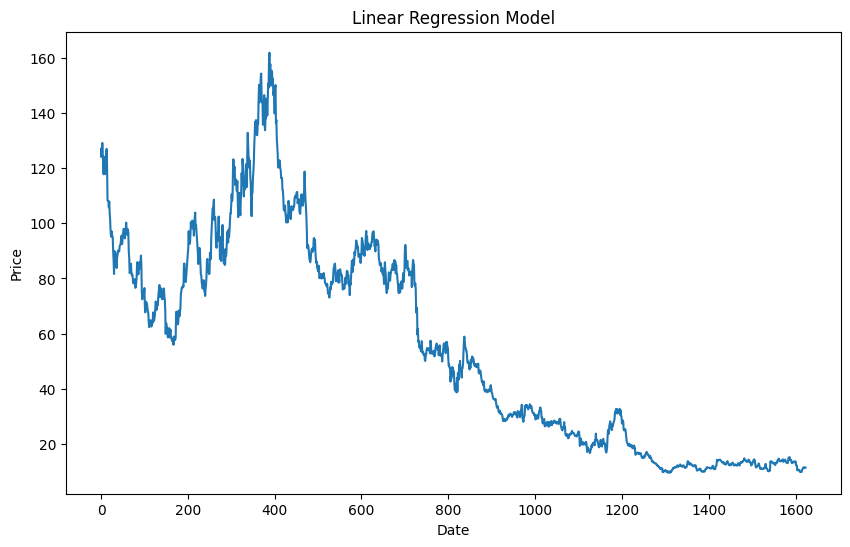

In [7]:
#Đảo ngược dữ liệu cho mô hình
df = df[::-1]

figure=df['Price'].values
plt.figure(figsize=(10,6))
plt.plot(figure)
plt.xlabel('Date')
plt.ylabel('Price') 
plt.title('Linear Regression Model')
plt.show()

In [8]:
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [9]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [10]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred_test = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [11]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[-3.91606022 -3.98898684 -4.06191346 -4.13484008 -4.2077667  -4.28069332
 -4.35361995 -4.42654657 -4.49947319 -4.57239981 -4.64532643 -4.71825305
 -4.79117968 -4.8641063  -4.93703292 -5.00995954 -5.08288616 -5.15581278
 -5.2287394  -5.30166603 -5.37459265 -5.44751927 -5.52044589 -5.59337251
 -5.66629913 -5.73922576 -5.81215238 -5.885079   -5.95800562 -6.03093224]


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

# Regression metrics
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mse = mean_squared_error(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)

valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
valid_mse = mean_squared_error(y_val, y_pred_val)
valid_mae = mean_absolute_error(y_val, y_pred_val)

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAE:', test_mae)

print('Validation RMSE:', valid_rmse)
print('Validation MSE:', valid_mse)
print('Validation MAE:', valid_mae)

Testing RMSE: 6.2935137491151965
Testing MSE: 39.60831531030202
Testing MAE: 5.496137896424709
Validation RMSE: 11.094461630252562
Validation MSE: 123.08707886514635
Validation MAE: 10.542357837674777


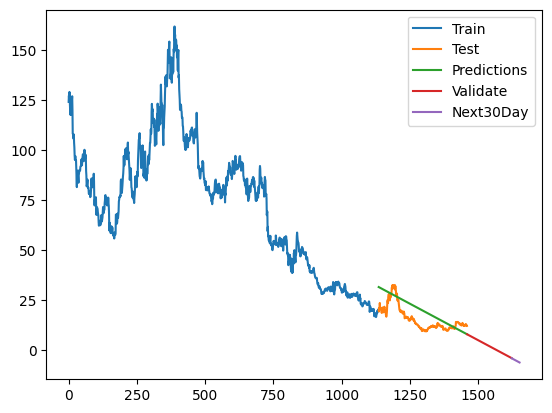

In [13]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()